<div class="admonition important alert alert-block alert-warning">
<p>⚠️ <strong>WICHTIG:</strong></p>
<p>
Die Auswertung der Programmieraufgaben erfolgt halbautomatisiert. Deshalb ist es wichtig, dass die Datei nur in den gekennzeichneten Bereichen verändert wird. Alle anderen Zellen sollen unberührt bleiben. Bitte keine Zellen löschen oder neue Zellen hinzufügen. Insbesondere die mit <code># Diese Zelle bitte NICHT verändern</code> markierten Zellen dienen der Auswertung und dürfen <strong>nicht</strong> verändert werden. Einige der darin befindlichen Tests sind aus dem Dokument entfernt, andere Testzellen wurden bewusst im Dokument gelassen und können gerne zur Prüfung des eigenen Codes ausgeführt (aber nicht verändert) werden.
</p></div>

In [1]:
import numpy as np
import pyfar as pf
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# 2 Eigenschaften eines LTI-Systems

In dieser Aufgabe werden Sie Impulsantwort und Frequenzgang eines LTI-Systems durch Entfaltung eines bandbegrenzten Sinus-Sweeps bestimmen.

# 2.1 Input- und Outputsignal (2P)
Laden Sie die Dateien `system_input.wav` und `system_output.wav` mit `pf.io.read_audio` in die Variablen `system_input` und `system_output`. Stellen Sie beide Signale in einem gemeinsamen `pf.plot.time_freq()` Plot dar. Fügen Sie eine Legende ein. (2P)

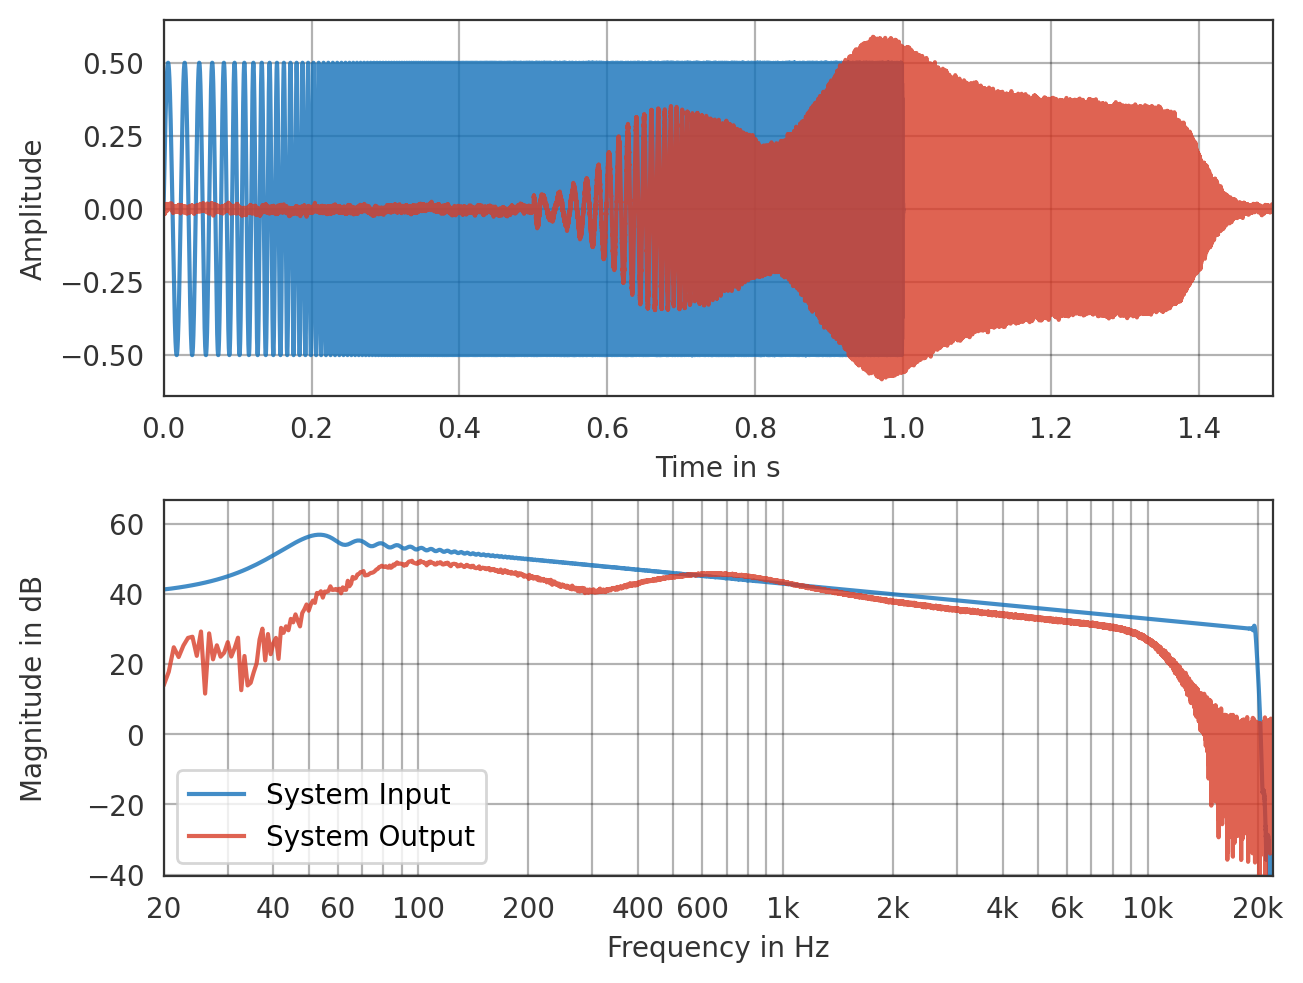

In [7]:
# ============= Ihre Lösung hier ===============
system_input = pf.io.read_audio('system_input.wav')
system_output = pf.io.read_audio('system_output.wav')

pf.plot.time_freq(system_input, label='System Input', alpha=0.8)
pf.plot.time_freq(system_output, label='System Output', alpha=0.8)
plt.legend()
plt.show()
# ==============================================

In [4]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert isinstance(system_input, pf.Signal)
assert isinstance(system_output, pf.Signal)
assert system_input.n_samples  == 44100, f'Expected 44100, got {system_input.n_samples}'
assert system_output.n_samples == 66150, f'Expected 66150, got {system_output.n_samples}'
assert np.isclose(pf.dsp.rms(system_input), 0.35416082), f'Expected 0.35416082, got {pf.dsp.rms(system_input)}'
assert np.isclose(pf.dsp.rms(system_output), 0.19811174), f'Expected 0.19811174, got {pf.dsp.rms(system_output)}'
### END TESTS

# 2.2 Sweep-Entfaltung (4P)
Bestimmen Sie die Impulsantwort des Systems durch Entfaltung des Ein- und Ausgangssignals. Benutzen Sie `pf.dsp.deconvolve()` und speichern Sie die Impulsantwort in der Variable `ir`. Stellen Sie die Impulsantwort im Zeit- und Frequenzbereich dar. (2P)

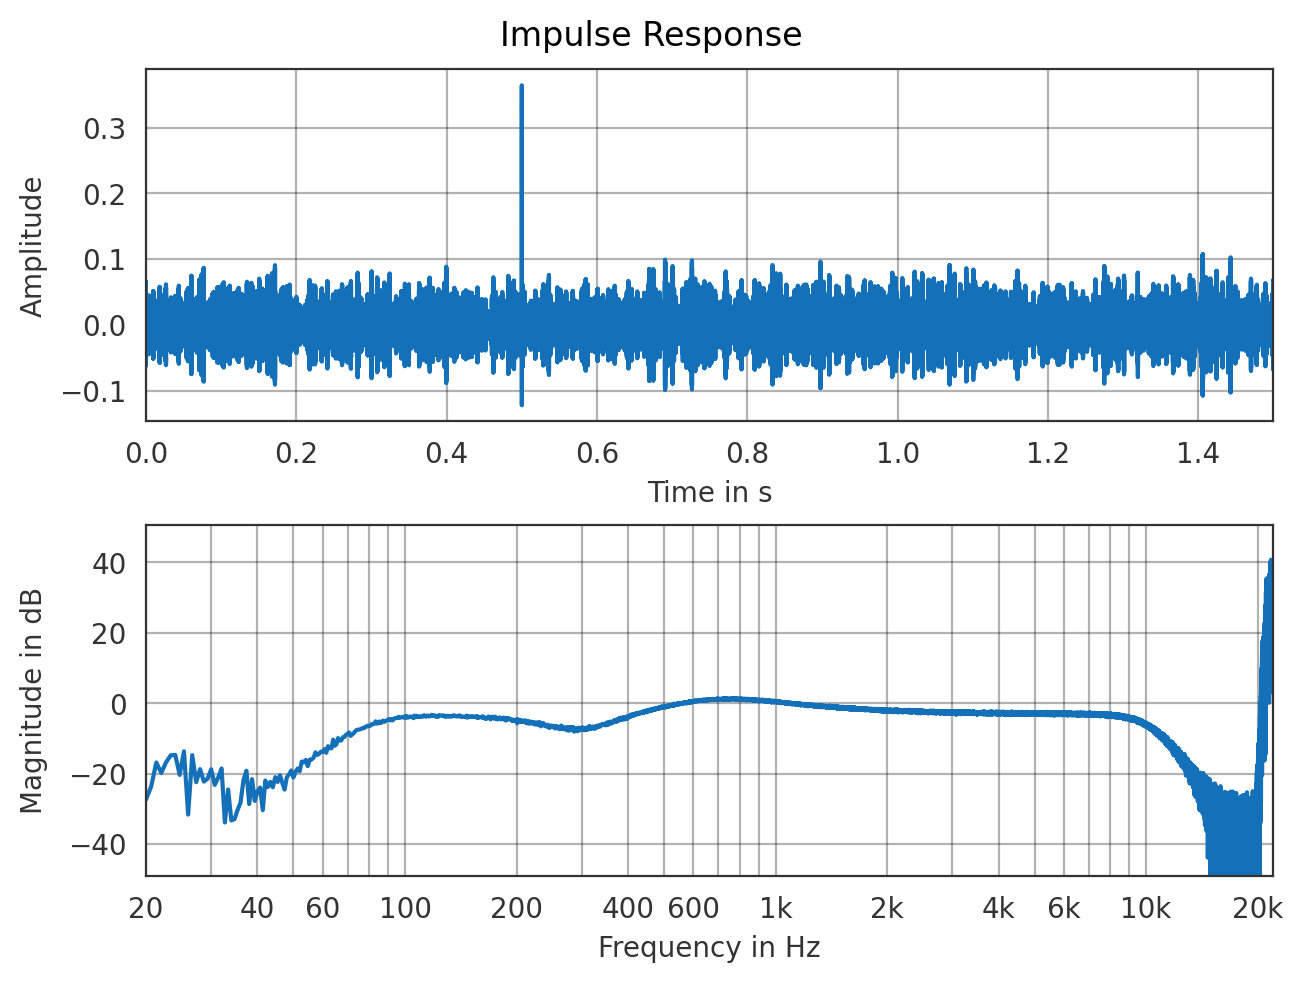

In [8]:
# ============= Ihre Lösung hier ===============
ir = pf.dsp.deconvolve(system_output=system_output, system_input=system_input)

pf.plot.time_freq(ir)
plt.suptitle('Impulse Response')
plt.show()
# ==============================================

In [9]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert isinstance(ir, pf.Signal)
assert ir.n_samples == 66150, f'Expected 66150, got {ir.n_samples}'
assert(np.isclose(pf.dsp.rms(ir), 0.0276089)), f'Expected 0.0276089, got {pf.dsp.rms(ir)}'
### END TESTS

Beschreiben Sie die Impulsantwort und ihr Spektrum. Was fällt Ihnen auf? Betrachten Sie das Spektrum des Eingangssignals.
Wo funktioniert die Entfaltung nicht, und warum? (2P)

---
_Ihre Lösung hier:_


---

# 2.3 Regularisierte Entfaltung (4P)
Benutzen Sie nun regularisierte Entfaltung, indem Sie der Funktion `pf.dsp.deconvolve` den Parameter `frequency_range` übergeben. Wählen Sie den Frequenzbereich so, dass Sie eine sinnvoll aussehende Impulsantwort erhalten. Speichern Sie die regularisierte Impulsantwort in der Variable `ir_regu`. Stellen Sie `ir` und `ir_regu` in einem gemeinsamen Plot im Zeit- und Frequenzbereich dar. Fügen Sie eine Legende ein. (2P)

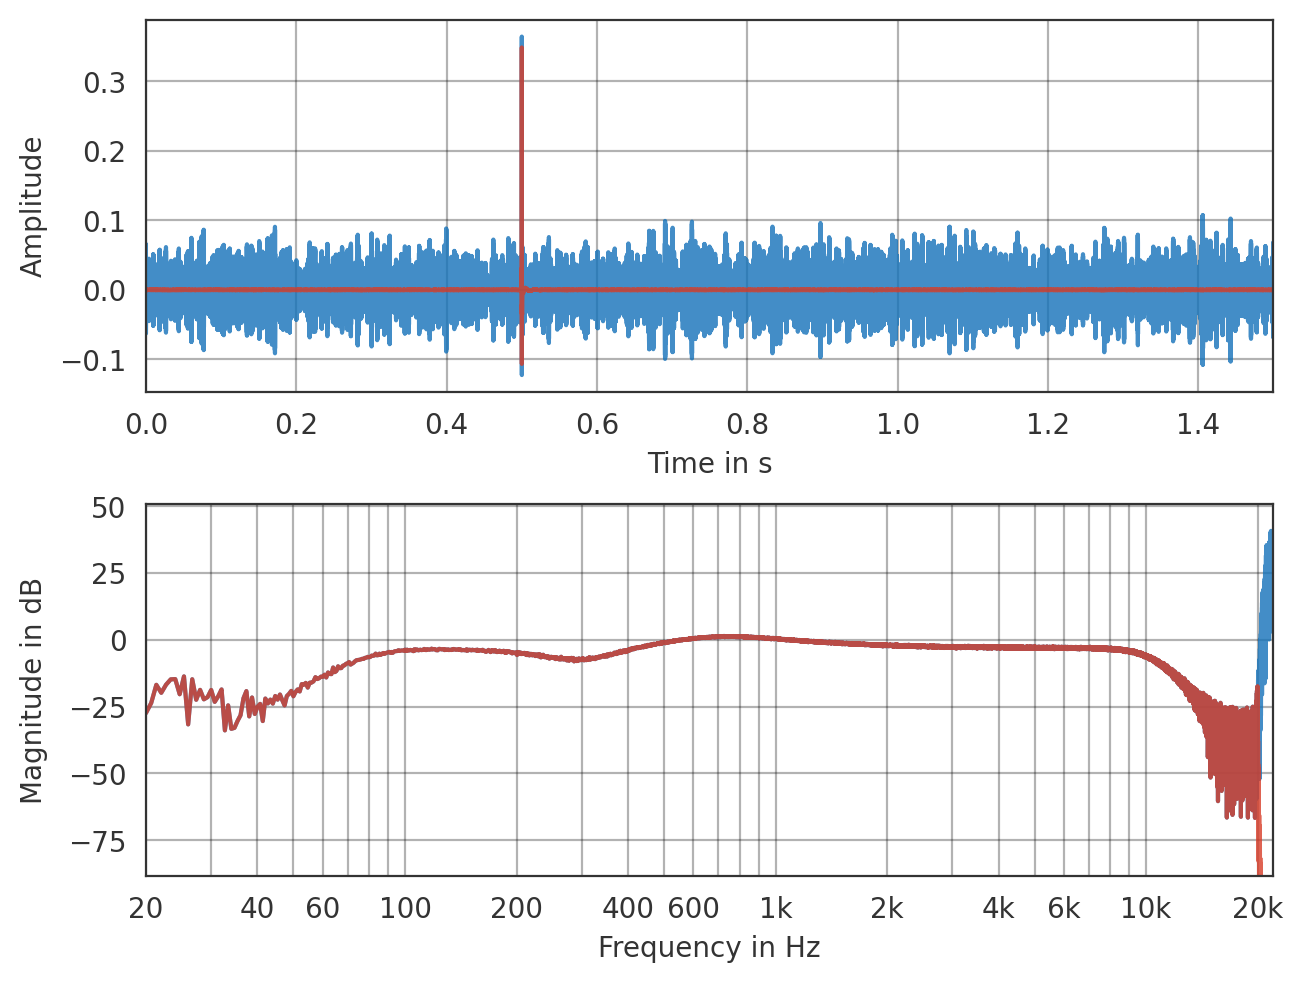

In [25]:
# ============= Ihre Lösung hier ===============
ir_regu = pf.dsp.deconvolve(system_output=system_output, system_input=system_input, frequency_range=(20, 20000))

# fig, ax = plt.subplots()
pf.plot.time_freq(ir, alpha=0.8, label='1')
pf.plot.time_freq(ir_regu, alpha=0.8)
# ax.legend()

plt.show()
# ==============================================

Beschreiben Sie die Unterschiede zwischen den beiden Impulsantworten und deren Spektren. Mit welcher Strategie haben Sie `frequency_range` gewählt? (2P)

---
_Ihre Lösung hier:_


---